In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=3)

In [2]:
def relu(z, deriv=False):
    activations = []
    shape = z.shape
    z = z.flatten()
    if deriv:  # Return Derivative of Function
        
        for i in range(len(z)):  # Element Wise
            if z[i] >= 0:
                activations.append(1)
            else:
                activations.append(0.2)
        return np.array(activations).reshape(shape)
    
    for i in range(len(z)):
        if z[i] > 0:
            activations.append(z[i])
        else:
            activations.append(0.2 * z[i])
            
    return np.array(activations).reshape(shape)

input = [1.,0.,-5.]

print('LeakyReLU: ', input, ' -> ', list(relu(np.array(input))))
print('LeakyReLU (deriv): ', input, ' -> ', list(relu(np.array(input), True)))

LeakyReLU:  [1.0, 0.0, -5.0]  ->  [1.0, 0.0, -1.0]
LeakyReLU (deriv):  [1.0, 0.0, -5.0]  ->  [1.0, 1.0, 0.2]


In [3]:
def add_layer(weight, bias, size, input_dim=None):
    if not input_dim:
        input_dim = weight[-1].shape[0]
    weight.append(1 * np.random.uniform(-1, 1, (size, input_dim)))
    bias.append(np.zeros(size))

w, b = [], []
add_layer(w, b, 3, 2)
add_layer(w, b, 3)
add_layer(w, b, 1)

In [4]:
a, z = [], []  # Global Variables

def forward_prop(X, do_print=False):
    h = X
    if do_print: print('h: ', h, h.shape)
    global a, z
    a,z  = [], []
    for i in range(len(w)):
        h = h @ w[i].T
        h = h + b[i] # bias add
        z.append(h)
        h = relu(h) # Activation Function
        a.append(h)
    return h

def loss(pred, y,):
    return 0.5* 1/len(y) * np.sum((pred - y)**2)

# Learning XOR 
The design Matrix $X$ contains all possible input datapoints, $y$ contains all corresponding labels.

In [5]:
X = np.array([[1,0], 
              [0,1], 
              [1,1], 
              [0,0]])
y = np.array([[1], [1], [0], [0]])

[Epoch 0] Loss: 0.1320602252394057
[Epoch 1] Loss: 0.09600139366412908
[Epoch 2] Loss: 0.07441261505777862
[Epoch 3] Loss: 0.060679810546298715
[Epoch 4] Loss: 0.04674223643447359
[Epoch 5] Loss: 0.023461641014626375
[Epoch 6] Loss: 0.0018827659505826174
[Epoch 7] Loss: 4.981378772515888e-05

Predictions:  [[9.983e-01 9.953e-01 6.752e-04 1.602e-03]]
Labels:  [[1 1 0 0]]
Delta: [[-0.002 -0.005  0.001  0.002]]


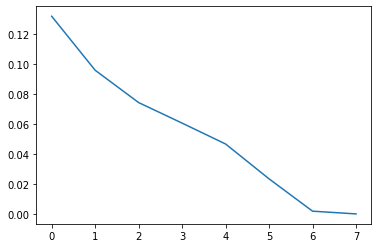

In [6]:
learning_rate = 0.3

def backprop_entry(X, label, print_loss=False):
    global a, z, w, b, n_weights, n_bias, learning_rate
    
    n_weights, n_bias = [], []  # List to store new weights & biases

    # Forward-propagation
    pred = forward_prop(X)
    backprop_rec(0, X, pred, label)
    
    # Update Weights
    w = list(reversed(n_weights))
    b = list(reversed(n_bias))
    
    if print_loss: loss(pred, label)  # Print loss if requested
        
    return loss(pred, label)  # Return loss


def backprop_rec(i, X, y, label):
    global a, z, w, b, n_weights, n_bias
    
    # Base Case
    if i+1 > len(w): return (y - label)

    # Pre Activation Deriv
    g = backprop_rec(i+1, X, y, label) * relu(z[i], True)  # Get Next Layer Derivative

    # Derivative with respect to weight  
    if i-1 < 0: prev_a = X  # Input Matrix
    else: prev_a = a[i-1]  # Previous Layer Activation

    # Save change in weights
    n_weights.append(w[i] - learning_rate * 1/len(X) * (prev_a.T @ g).T)
    n_bias.append(b[i] - learning_rate * 1/len(X) * np.mean(g, axis=0))
    
    return g @ w[i]

def train_rec(epochs, size=100, threshold=0.0001, print_interval=1):
    l = []  # loss per epoch
    
    for i in range(epochs):
        sum_loss = 0.0
        for x in range(size):
            sum_loss += backprop_entry(X, y)
        l.append(sum_loss/size)
        if not i % print_interval: print(f'[Epoch {i}] Loss: {l[-1]}')
        if l[-1] < threshold or l[-1] != l[-1]: break
    return np.array(l).flatten()

# Reinitialize Weights & Biases
w, b = [], []

# NN architecture
add_layer(w, b, 3, 2)
add_layer(w, b, 3)
add_layer(w, b, 1)

loss_over_time = train_rec(15,100)

plt.plot(loss_over_time)
print('\nPredictions: ', forward_prop(X).T)
print('Labels: ', y.T)
print(f'Delta: {(forward_prop(X)-y).T}')

# Iris Dataset

In [7]:
data = pd.read_csv('./data/iris.data', header=None)
data.sample(4)

,0,1,2,3,4
100,6.3,3.3,6.0,2.5,Iris-virginica
63,6.1,2.9,4.7,1.4,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor


## One Hot Encode Labels

In [8]:
data = pd.concat([data,pd.get_dummies(data.iloc()[:,4])],axis=1)
data = data.drop(data.columns[4], axis=1)
data.sample(4)

,0,1,2,3,Iris-setosa,Iris-versicolor,Iris-virginica
142,5.8,2.7,5.1,1.9,0,0,1
86,6.7,3.1,4.7,1.5,0,1,0
22,4.6,3.6,1.0,0.2,1,0,0
117,7.7,3.8,6.7,2.2,0,0,1


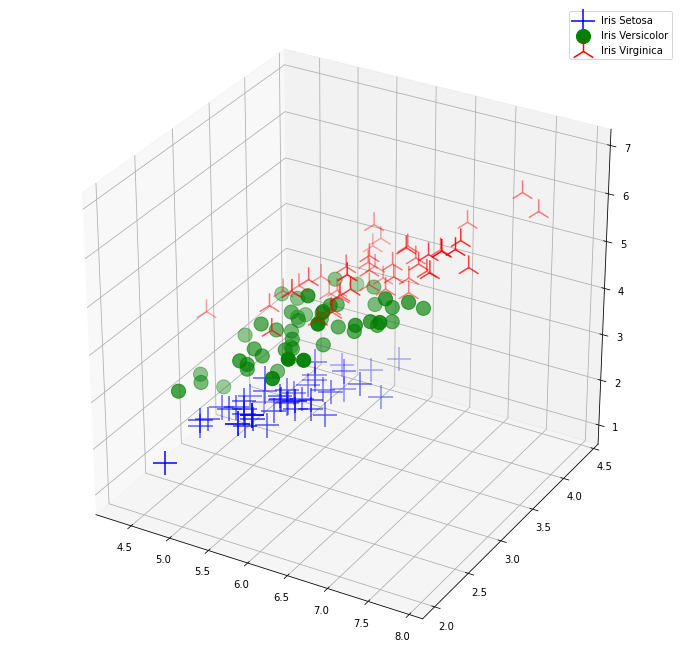

In [9]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
setosa = data.loc[data['Iris-setosa'] == 1]
xs, ys, zs, c = setosa.iloc()[:,0], setosa.iloc()[:,1], setosa.iloc()[:,2], setosa.iloc()[:,3]
ax.scatter(xs, ys, zs, marker='+', c='blue', cmap=plt.hot(), s=600, label='Iris Setosa')

setosa = data.loc[data['Iris-versicolor'] == 1]
xs, ys, zs, c = setosa.iloc()[:,0], setosa.iloc()[:,1], setosa.iloc()[:,2], setosa.iloc()[:,3]
ax.scatter(xs, ys, zs, marker='o', c='green', cmap=plt.hot(), s=200, label='Iris Versicolor')

setosa = data.loc[data['Iris-virginica'] == 1]
xs, ys, zs, c = setosa.iloc()[:,0], setosa.iloc()[:,1], setosa.iloc()[:,2], setosa.iloc()[:,3]
ax.scatter(xs, ys, zs, marker='2', c='red', cmap=plt.hot(), s=600, label='Iris Virginica')
ax.legend()
plt.show()

## Split Dataset into Training/Testing

In [10]:
# Shuffle Data
data = data.sample(len(data))

# % of data used for training
split_factor = 0.8  

# Splitting
data_training = data[:round(len(data) * split_factor)]
data_testing = data[round(len(data) * split_factor):]
print(f'Training Data Size: {len(data_training)}')
print(f'Eval Data Size: {len(data_testing)}')

Training Data Size: 120
Eval Data Size: 30


In [11]:
def get_batch(size, eval=False):
    if eval:
        d = data_testing.sample(size, replace=True).to_numpy()
    else:
        d = data_training.sample(size, replace=True).to_numpy()
    return d[:,:4], d[:, 4:]

def plot(size, save=None, title=''):
    fig = plt.figure(figsize=(12,12))
    
    color = size - np.mean(size, axis=0)
    ax = fig.add_subplot(111, projection='3d')
    
    setosa = data.loc[data['Iris-setosa'] == 1]
    xs, ys, zs, c = setosa.iloc()[:,0], setosa.iloc()[:,1], setosa.iloc()[:,2], setosa.iloc()[:,3]
    ax.scatter(xs, ys, zs, marker='+', c=color[data['Iris-setosa'] == 1], cmap='bwr', s=size[data['Iris-setosa'] == 1])

    setosa = data.loc[data['Iris-versicolor'] == 1]
    xs, ys, zs, c = setosa.iloc()[:,0], setosa.iloc()[:,1], setosa.iloc()[:,2], setosa.iloc()[:,3]
    ax.scatter(xs, ys, zs, marker='o', c=color[data['Iris-setosa'] == 1], cmap='bwr', s=size[data['Iris-setosa'] == 1])

    setosa = data.loc[data['Iris-virginica'] == 1]
    xs, ys, zs, c = setosa.iloc()[:,0], setosa.iloc()[:,1], setosa.iloc()[:,2], setosa.iloc()[:,3]
    ax.scatter(xs, ys, zs, marker='2', c=color[data['Iris-setosa'] == 1], cmap='bwr', s=size[data['Iris-setosa'] == 1])
    ax.set_title(title, loc='left')
    
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()
    
def plot_progress(epoch, title):
    pred = forward_prop(data.iloc()[:,:4].to_numpy())
    x = np.array([loss(pred[i], data.iloc()[i, 4:].to_numpy()) for i in range(len(pred))])
    plot(x*10500, f'./plot/plot-{str(epoch).zfill(10)}.png', title)
    
def eval_iris(n=20, silent=False):
    X, y = get_batch(n, eval=True)
    pred = forward_prop(X)
    for p, label in zip(pred, y):
        if not silent: print(f'Prediction: {np.argmax(p)} ({np.argmax(label)}) [{loss(p, label)}]')
    return np.sum(loss(p,label))

## Training
### Define Network Architecture

[Epoch: 0] Loss: 0.867012153548572
[Epoch: 100] Loss: 0.35903621151688625
[Epoch: 200] Loss: 0.28763494514598753
[Epoch: 300] Loss: 0.20082932780386628
[Epoch: 400] Loss: 0.14327876936626055
[Epoch: 500] Loss: 0.12777628194251844
[Epoch: 600] Loss: 0.08792964976441468
[Epoch: 700] Loss: 0.09182678498211484
[Epoch: 800] Loss: 0.0696456997843796
[Epoch: 900] Loss: 0.10291138468440549


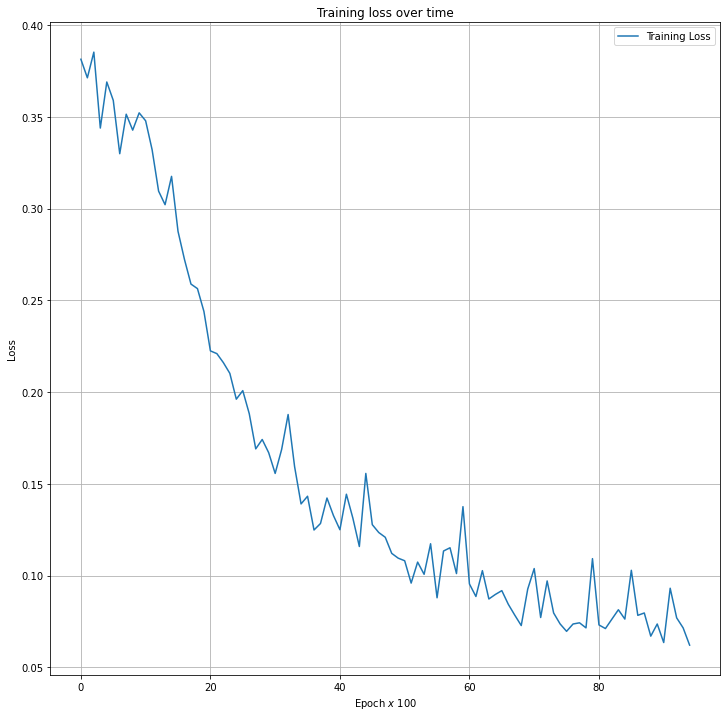

In [12]:
# Reinitialize Weights & Biases
w, b = [], []

# NN architecture
add_layer(w, b, 3, input_dim=4)
add_layer(w, b, 9)
add_layer(w, b, 9)
add_layer(w, b, 3)

# Hyper parameters
learning_rate = 0.02

# Training function
def train_iris(epochs, size=100, threshold=0.0001, print_interval=1):
    l, l_eval = [], []
    for epoch in range(epochs):
         
        # Get batch from training set
        X, y = get_batch(size)
        
        # Backprop call
        loss = backprop_entry(X, y)
        
        if not epoch % 10:
            l.append(loss)
            l_eval.append(eval_iris(1000, silent=True))
            
        # Stop training on nan/inf
        if np.isnan(loss) or np.isinf(loss) or loss > 40: return
        
#         if not epoch % print_interval: plot_progress(i, title=f'Epoch {epoch}\nLoss: {loss}')  # Plot Progress to ./plot
        if not epoch % print_interval: print(f'[Epoch: {epoch}] Loss: {loss}')
    return np.array(l).flatten(), np.array(l_eval).flatten()


# Training operation
loss_over_time, loss_eval = train_iris(1000, 100, print_interval=100)

# Plot loss over time
fig, ax = plt.subplots(figsize=(12,12))
ax.grid()
ax.set(xlabel='Epoch $x\ 100$', ylabel='Loss',
       title='Training loss over time')
ax.plot(loss_over_time[5:], label='Training Loss')
# ax.plot(loss_eval[5:], label='Eval Loss')
ax.legend()

In [13]:
eval_iris()

Prediction: 0 (0) [0.017435631491662648]
Prediction: 0 (0) [0.007893023929826135]
Prediction: 0 (0) [0.007893023929826135]
Prediction: 0 (0) [0.009542576554995044]
Prediction: 0 (0) [0.00624023411706102]
Prediction: 2 (2) [0.008353831968972188]
Prediction: 2 (2) [0.013044980807449766]
Prediction: 0 (0) [0.017435631491662648]
Prediction: 2 (2) [0.007954091807512838]
Prediction: 0 (0) [0.00624023411706102]
Prediction: 2 (2) [0.005338690897338455]
Prediction: 2 (2) [0.014084387505224855]
Prediction: 0 (0) [0.006120611145998736]
Prediction: 0 (0) [0.007612524039948482]
Prediction: 0 (0) [0.006197234360131515]
Prediction: 1 (1) [0.011231905545331943]
Prediction: 2 (2) [0.013888628163829145]
Prediction: 2 (2) [0.007954091807512838]
Prediction: 2 (2) [0.0053053282147094705]
Prediction: 1 (1) [0.015001461349684875]


0.015001461349684875